# Features Time Series Generation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from tqdm import tqdm
import random
import ast
import nltk
from lyrics_stats import lyrics_statistics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

In [2]:
df = pd.read_csv('../data/evaluation/lyrics_eval.csv')

In [3]:
df.head()

,index,lyrics,genre,outlier,id,similar_lyrics,random_lyrics
0,17253,"[""All i know when #i'm# with you"", 'My little...",rap,False,17253,"[""All y knew was #i'm# with that"", 'My little...","['The more you see of your love', 'The more yo..."
1,24217,"[""Kells, you know i can't keep doing this, i g...",rap,False,24217,"[""Kells, your know im can't resist doing it, i...","['Oh God! Oh God! Ugh', ""9-1-1 What's your eme..."
2,18238,"['Put on your booty shorts', 'Ooh, I really li...",rap,False,18238,"['Put on those booty kit', 'Ooh, I really like...","['Verse One: Raekwon the Chef', 'Machine gun r..."
3,17181,"['Fargo, get on some real yard shit', 'Come in...",rap,False,17181,"['Fargo, spilling over the real yard shit', 'C...","[""See you've got the new biography"", 'Where di..."
4,14845,"['Hands up in the air', 'I just want the', 'I ...",rap,False,14845,"['Hands flung into the air', 'I just wanted to...","['More rest and sex is all a nigga needs', 'In..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           100 non-null    int64 
 1   lyrics          100 non-null    object
 2   genre           100 non-null    object
 3   outlier         100 non-null    bool  
 4   id              100 non-null    int64 
 5   similar_lyrics  100 non-null    object
 6   random_lyrics   100 non-null    object
dtypes: bool(1), int64(2), object(4)
memory usage: 4.9+ KB


In [5]:
df['lyrics'] = list(map(lambda x: ast.literal_eval(x), df['lyrics']))
df['similar_lyrics'] = list(map(lambda x: ast.literal_eval(x), df['similar_lyrics']))
df['random_lyrics'] = list(map(lambda x: ast.literal_eval(x), df['random_lyrics']))

In [6]:
random.choice(df['lyrics'])

['Fargo, get on some real yard shit',
 'Come in on it like this',
 'No one gyal can satisfy me',
 'Mi need more fuel for the lime green',
 'Mi nuh know one gyal can deny me',
 'Mi know seh mi chain shiny but why pree?',
 'Mi a controlla, young soldier, one sofa',
 'Any man ah diss we ah go get slumped over',
 'Nuh fi scared of the ting, gyal come closer',
 'You need fi come over',
 'Bad man we nuh watch that',
 'Even when mi need fi watch that',
 'I got my gun on me',
 'If mi ever need fi shot that',
 'One time, yeah',
 'One time for the rude boy, yeah, you know that',
 'Hundred down on the new toy and you know that',
 "I've been looking for you baby",
 'You need somebody wavy',
 '300 Down on the wraith, I bought the whole thing',
 "Young nigga getting this cake, it's not a joke ting",
 "I'm that nigga and I'm wavy",
 'These hoes never bout to play me, okay',
 'And nuh wait for the ting',
 'She ah push pon it',
 "But I'm on it",
 'Shawty up on me',
 'Come bruk it on me',
 "Baby I'm on 

## Lyrics features

In [7]:
toy_lyrics = pd.read_csv('../data/toy-lyrics/toy_lyr.csv', sep='\t')
toy_lyrics.head()

,lyrics,part
0,"I wake up every morning, with the sun in my eyes",verse
1,"I stumble out of bed, and I hit the ground run...",verse
2,"I've got a lot on my plate, but I don't mind t...",verse
3,"I know I've got what it takes, to make it down...",verse
4,"I'm living for today, and I'm chasing my dreams",chorus


In [8]:
eg_lyrics = list(toy_lyrics['lyrics'])
eg_lyrics

['I wake up every morning, with the sun in my eyes',
 'I stumble out of bed, and I hit the ground running',
 "I've got a lot on my plate, but I don't mind the load",
 "I know I've got what it takes, to make it down the road",
 "I'm living for today, and I'm chasing my dreams",
 "I won't let anyone stand in my way, or burst at the seams",
 "I'm on a mission, to reach for the stars",
 "I'm unstoppable, behind the steering wheel of my car",
 "I hit the pavement, and I don't look back",
 "I've got my foot on the gas, and I'm on the right track",
 "I know I've got what it takes, to make it to the top",
 "I won't stop until I reach the mountaintop",
 "I'm living for today, and I'm chasing my dreams",
 "I won't let anyone stand in my way, or burst at the seams",
 "I'm on a mission, to reach for the stars",
 "I'm unstoppable, behind the steering wheel of my car",
 "I've got my eyes on the prize, and I won't let it go",
 "I'll keep on fighting, with all my might and my mojo"]

In [9]:
lyrics_stats = pd.DataFrame(lyrics_statistics(eg_lyrics))
lyrics_stats.head()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,verbs_count,nouns_count,adjectives_count,adverbs_count
0,11,0,9,3.363636,5.62,0.055556,1.000000,6.181818,3.782609,1,3,0,0
1,11,0,9,3.545455,5.62,0.055556,0.909091,8.090909,3.518519,3,2,0,0
2,13,0,13,2.615385,0.64,0.055556,0.923077,8.153846,4.000000,4,3,0,1
3,13,0,13,3.000000,5.50,0.055556,0.846154,7.846154,4.818182,5,1,0,0
4,9,0,6,3.777778,7.59,0.111111,0.888889,9.666667,2.545455,4,2,0,0


In [10]:
lyrics_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   verse_length                18 non-null     int64  
 1   monosyl_words_count         18 non-null     int64  
 2   polysyl_words_count         18 non-null     int64  
 3   avg_token_length            18 non-null     float64
 4   readability_score           18 non-null     float64
 5   normalized_verse_frequency  18 non-null     float64
 6   verse_ttr                   18 non-null     float64
 7   avg_token_frequency         18 non-null     float64
 8   avg_phoneme_frequency       18 non-null     float64
 9   verbs_count                 18 non-null     int64  
 10  nouns_count                 18 non-null     int64  
 11  adjectives_count            18 non-null     int64  
 12  adverbs_count               18 non-null     int64  
dtypes: float64(6), int64(7)
memory usage:

In [11]:
lyrics_stats.describe()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,verbs_count,nouns_count,adjectives_count,adverbs_count
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,10.833333,0.166667,9.444444,3.376327,5.503889,0.080247,0.921701,8.141792,3.315577,3.055556,2.277778,0.166667,0.388889
std,1.947849,0.383482,2.894665,0.582586,2.445180,0.028406,0.077022,1.337016,0.898337,1.211330,1.178511,0.383482,0.607685
min,8.000000,0.000000,6.000000,2.538462,0.450000,0.055556,0.769231,6.153846,2.294118,1.000000,1.000000,0.000000,0.000000
25%,9.000000,0.000000,6.500000,3.038462,5.500000,0.055556,0.888889,7.666667,2.526364,2.000000,2.000000,0.000000,0.000000
50%,11.000000,0.000000,9.000000,3.222222,5.620000,0.055556,0.916084,7.968531,3.262846,3.000000,2.000000,0.000000,0.000000
75%,13.000000,0.000000,12.750000,3.719697,7.590000,0.111111,1.000000,9.455128,3.945652,4.000000,2.750000,0.000000,1.000000
max,13.000000,1.000000,13.000000,4.555556,7.590000,0.111111,1.000000,10.250000,4.904762,5.000000,5.000000,1.000000,2.000000


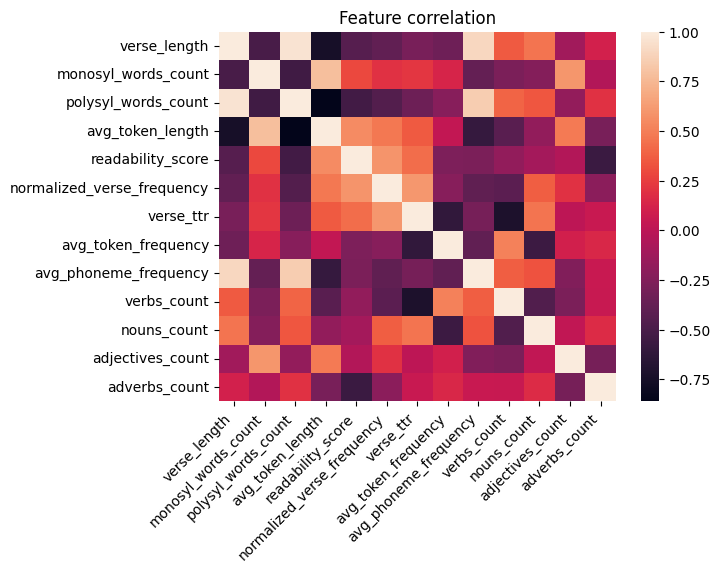

In [12]:
fig, ax = plt.subplots()
ax = sns.heatmap(lyrics_stats.corr())
ax.set_title('Feature correlation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Time Series

In [13]:
eg_multi_ts = pd.DataFrame(lyrics_stats, columns=lyrics_stats.columns)
eg_multi_ts.head()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,verbs_count,nouns_count,adjectives_count,adverbs_count
0,11,0,9,3.363636,5.62,0.055556,1.000000,6.181818,3.782609,1,3,0,0
1,11,0,9,3.545455,5.62,0.055556,0.909091,8.090909,3.518519,3,2,0,0
2,13,0,13,2.615385,0.64,0.055556,0.923077,8.153846,4.000000,4,3,0,1
3,13,0,13,3.000000,5.50,0.055556,0.846154,7.846154,4.818182,5,1,0,0
4,9,0,6,3.777778,7.59,0.111111,0.888889,9.666667,2.545455,4,2,0,0


In [14]:
ss = StandardScaler()
eg_scl_multi_ts = pd.DataFrame(ss.fit_transform(eg_multi_ts),columns = eg_multi_ts.columns)
eg_scl_multi_ts.head()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,verbs_count,nouns_count,adjectives_count,adverbs_count
0,0.088045,-0.447214,-0.157991,-0.022415,0.048862,-0.894427,1.046058,-1.508431,0.534957,-1.746138,0.630593,-0.447214,-0.658505
1,0.088045,-0.447214,-0.157991,0.298721,0.048862,-0.894427,-0.168468,-0.039160,0.232457,-0.047193,-0.242536,-0.447214,-0.658505
2,1.144586,-0.447214,1.263924,-1.344015,-2.046843,-0.894427,0.018382,0.009277,0.783966,0.802280,0.630593,-0.447214,1.034793
3,1.144586,-0.447214,1.263924,-0.664688,-0.001637,-0.894427,-1.009293,-0.227528,1.721145,1.651752,-1.115664,-0.447214,-0.658505
4,-0.968496,-0.447214,-1.224426,0.709062,0.877886,1.118034,-0.438362,1.173571,-0.882130,0.802280,-0.242536,-0.447214,-0.658505


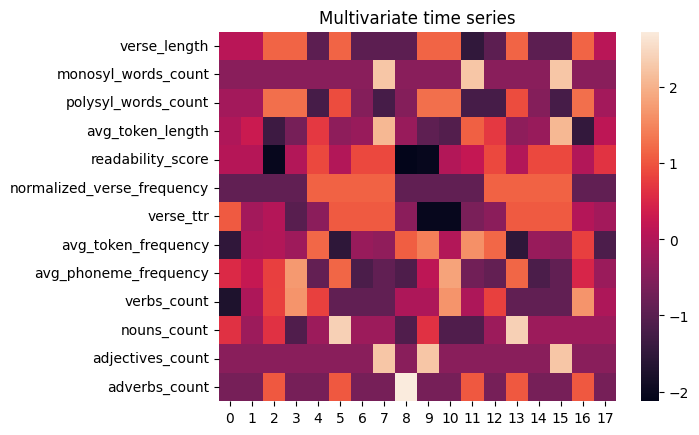

In [15]:
fig, ax = plt.subplots()
ax = sns.heatmap(eg_scl_multi_ts.T)
ax.set_title('Multivariate time series')
plt.show()

In [16]:
parts_of_lyrics = list(toy_lyrics['part'])
color_map = {}
for idx, part_of_lyrics in enumerate(list(dict.fromkeys(parts_of_lyrics))):    
    # Map color excluding first color of the palette 
    color_map[part_of_lyrics] = sns.color_palette()[idx+1]

In [17]:
eg_uniavg_ts = np.mean(eg_scl_multi_ts.values, axis=1)

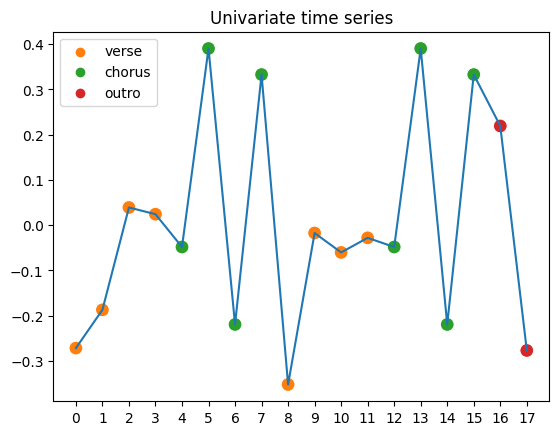

In [18]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_uniavg_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_uniavg_ts, 
                     x = range(len(eg_uniavg_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_uniavg_ts)))
plt.show()

In [19]:
eg_unimax_ts = np.max(eg_scl_multi_ts.values, axis=1)

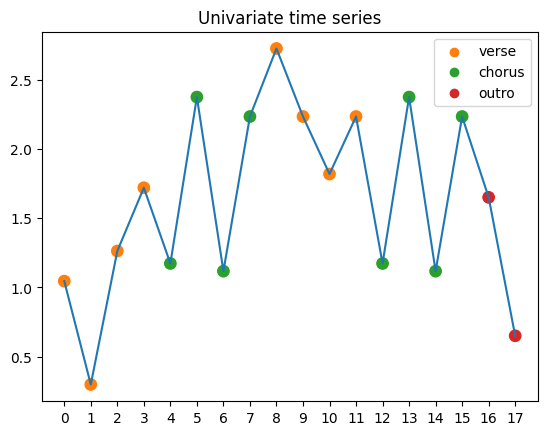

In [20]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_unimax_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_unimax_ts, 
                     x = range(len(eg_unimax_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_unimax_ts)))
plt.show()

In [21]:
pca = PCA(n_components=1, random_state=0)

pca_output = pca.fit_transform(eg_scl_multi_ts.values)

eg_unipca_ts = np.array(list(
    map(lambda unique_element: unique_element[0], pca_output)))

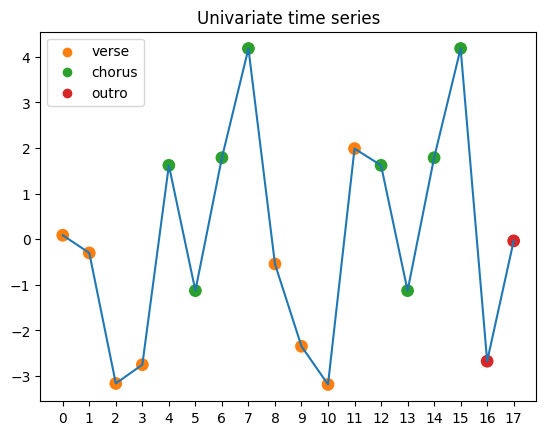

In [22]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_unipca_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_unipca_ts, 
                     x = range(len(eg_unipca_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_unipca_ts)))
plt.show()

In [23]:
global_scaler = joblib.load('../models/features_scaler.pkl')
global_pca = joblib.load('../models/features_pca.pkl')

In [24]:
pca_output = global_pca.transform(
    global_scaler.transform(eg_multi_ts.values))

eg_unigpca_ts = np.array(list(
    map(lambda unique_element: unique_element[0], pca_output)))

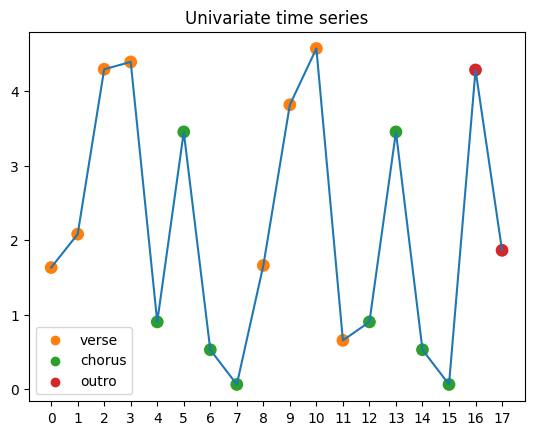

In [25]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_unigpca_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_unigpca_ts, 
                     x = range(len(eg_unigpca_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_unigpca_ts)))
plt.show()

In [26]:
def generate_uni_ts(multi_ts, normalize=False, pooling_method='avg', scaler=None, pca=None):
    """
    Convert a multi-variate time series represented as a numpy array into a uni-variate time series.
    
    Parameters
    ----------
    multi_ts : numpy array
        A 2D array representing the multi-variate time series with shape (n_samples, n_features)
    normalize: bool, optional
        Whether to normalize the input data using standard scaler. Default is False.
    pooling_method : str, optional
        The method to use for pooling the multi-variate time series into a uni-variate time series.
        Must be one of 'avg', 'max', or 'pca'. Default is 'avg'.
    scaler: object, optional
        Scaler object to use to normalize the data. Default is None.
    pca: object, optional
        PCA object to use to reduce the data. Default is None.
        
    Returns
    -------
    uni_ts : numpy array
        A 1D array representing the uni-variate time series with shape (n_samples,)
        
    Raises
    ------
    ValueError
        If an invalid value is passed for the pooling_method
    """
    if normalize:
        if scaler is None:
            scaler = StandardScaler()
            multi_ts = scaler.fit_transform(multi_ts)
        else:
            multi_ts = scaler.transform(multi_ts)
    if pooling_method=='avg':            
        uni_ts = np.mean(multi_ts, axis=1)            
    elif pooling_method=='max':            
        uni_ts = np.max(multi_ts, axis=1)            
    elif pooling_method=='pca':                
        if pca is None:            
            pca = PCA(n_components=1, random_state=0)
            pca_output = pca.fit_transform(multi_ts)
        else: 
            pca_output = pca.transform(multi_ts)       
        uni_ts = np.array(list(
            map(lambda unique_element: unique_element[0] , pca_output)))                                     
    else:
        raise ValueError("Invalid pooling_method passed. Please use either 'avg', 'max' or 'pca'.")        
    return uni_ts

In [27]:
print(any(eg_uniavg_ts == generate_uni_ts(eg_multi_ts.values,
                                          normalize=True, 
                                          pooling_method='avg')))

print(any(eg_unimax_ts == generate_uni_ts(eg_multi_ts.values, 
                                          normalize=True, 
                                          pooling_method='max')))

print(any(eg_unipca_ts == generate_uni_ts(eg_multi_ts.values, 
                                          normalize=True, 
                                          pooling_method='pca')))

print(any(eg_unigpca_ts == generate_uni_ts(eg_multi_ts.values, 
                                           normalize=True, 
                                           pooling_method='pca', 
                                           scaler=global_scaler, 
                                           pca=global_pca)))

True
True
True
True


In [ ]:
methods = [{'pooling_method': 'avg', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'avg'},
           {'pooling_method': 'max', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'max'},
           {'pooling_method': 'pca', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'pca'},
           {'pooling_method': 'pca', 'normalize': True, 'scaler': global_scaler, 'pca': global_pca, 'filename': 'gpca'},
           ]

for method in methods:    
    print(f'{method["filename"]}:')    
    ts_data = {}
    for lyrics_type in ['lyrics', 'similar_lyrics', 'random_lyrics']:
        print(lyrics_type)
        ts_data[lyrics_type] = []
        for lyr in tqdm(df[lyrics_type]):
            multi_ts = pd.DataFrame(lyrics_statistics(lyr))
            uni_ts = generate_uni_ts(multi_ts.values, 
                                     normalize=method['normalize'], 
                                     pooling_method=method['pooling_method'],
                                     scaler=method['scaler'],
                                     pca=method['pca'])
            uni_ts = list(uni_ts)
            ts_data[lyrics_type].append(uni_ts)
    ts_data = pd.DataFrame(ts_data)
    filename = f'../data/evaluation/time-series/features_{method["filename"]}_ts.csv'
    ts_data.to_csv(filename, index=False)
    print('___')

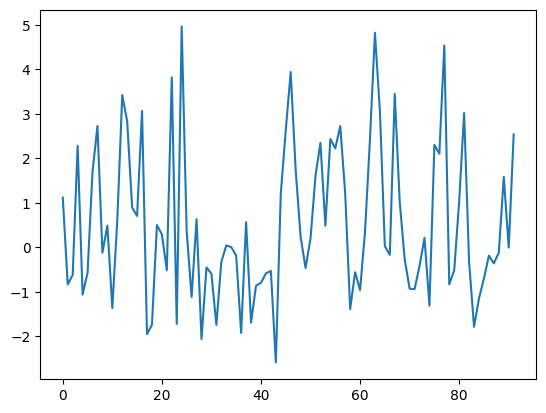

In [29]:
plt.plot(random.choice(ts_data['lyrics']))